# Capacity Scaling vs Linear Programming

**For detailed explanation of each experiment configurations, see './experiments/configs'**

In [1]:
from scipy.stats import skewnorm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from qgrid import show_grid

from ipywidgets import interact

experiment_results_path = './experiments/results/'
eps = 0.1 # just to prevent zero log in plotting
figures_path = './figures/'

## Experiment 1

In [3]:
experiment_results1 = pd.read_csv(experiment_results_path + 'experiment1.csv', sep='|')
experiment_results1 = experiment_results1.replace({'ERROR':np.nan, 'None':np.nan})
experiment_results1['execution_time'] = experiment_results1['execution_time'].astype(float)
experiment_results1['density'] = 1 - experiment_results1['sparsity']
experiment_results1['edge_count'] = experiment_results1.node_count ** 2 / experiment_results1['sparsity']

algo_names = experiment_results1.name.unique()
show_grid(experiment_results1)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

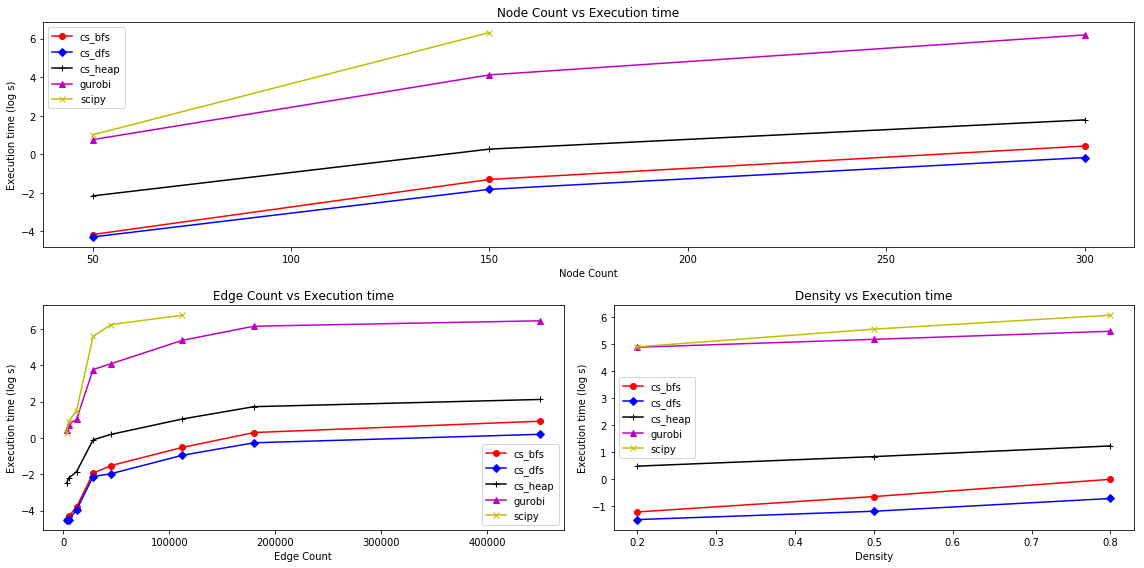

In [14]:
# node count effect
results_by_node_count = experiment_results1.groupby(['name', 'node_count'])['execution_time'].mean()
results_by_edge_count = experiment_results1.groupby(['name', 'edge_count'])['execution_time'].mean()
results_by_density = experiment_results1.groupby(['name', 'density'])['execution_time'].mean()

markers = ['o','D','+', '^', 'x']
colors = ['r','b','k','m','y']

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0, :])
ax.set_xlabel('Node Count')
ax.set_ylabel('Execution time (log s)')
ax.set_title('Node Count vs Execution time')
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(np.log(results_by_node_count[name]), label=name, marker=marker, color=color)
plt.legend()
    
ax = plt.subplot(gs[1, 0])
ax.set_xlabel('Edge Count')
ax.set_ylabel('Execution time (log s)')
ax.set_title('Edge Count vs Execution time')
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(np.log(results_by_edge_count[name]), label=name, marker=marker, color=color)  
plt.legend()

ax = plt.subplot(gs[1, 1])
ax.set_xlabel('Density')
ax.set_ylabel('Execution time (log s)')
ax.set_title('Density vs Execution time')

for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(np.log(results_by_density[name]), label=name, marker=marker, color=color)
plt.legend()

plt.tight_layout()
plt.show()
fig.savefig(figures_path + 'exp1_plot1.png')

In [17]:
experiment_results1.groupby('name')['execution_time'].mean()

name
cs_bfs       0.607898
cs_dfs       0.340433
cs_heap      2.459986
gurobi     183.855004
scipy      276.781451
Name: execution_time, dtype: float64

In [6]:
def plot_histogram(distribution,mean,std,skewness):
    random_numbers = skewnorm.rvs(a=skewness, loc=mean, scale=std, size=1000)
    sns.distplot(random_numbers,bins=int(max(random_numbers)+1-min(random_numbers)),color='b')
    plt.show()
    
means = [50, 1000]
stds = [3, 30]
skews = [-10,0,10]
interact(plot_histogram,distribution=['normal'],mean=means,std=stds,skewness=skews);

interactive(children=(Dropdown(description='distribution', options=('normal',), value='normal'), Dropdown(desc…

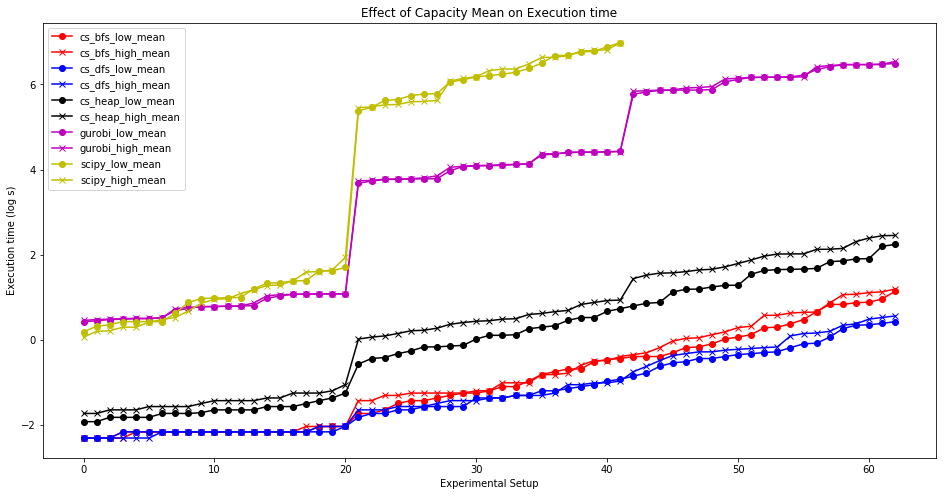

In [19]:
high_mean_results = experiment_results1[experiment_results1['mean'] == 1000].sort_values('execution_time')
low_mean_results = experiment_results1[experiment_results1['mean'] == 50].sort_values('execution_time')

markers = ['o','D','+', '^', 'x']
colors = ['r','b','k','m','y']

fig = plt.figure(figsize=(16,8))
x_values = range(len(high_mean_results.index) // len(algo_names))
plt.xlabel('Experimental Setup')
plt.ylabel('Execution time (log s)')
plt.title('Effect of Capacity Mean on Execution time')

for name,color in zip(algo_names, colors):
    plt.plot(x_values, np.log(low_mean_results[low_mean_results['name'] == name]['execution_time']+eps), marker='o', color=color, label=name+'_low_mean')
    plt.plot(x_values, np.log(high_mean_results[high_mean_results['name'] == name]['execution_time']+eps), marker='x', color=color, label=name+'_high_mean')

plt.legend();
fig.savefig(figures_path + 'exp1_capacity_mean')

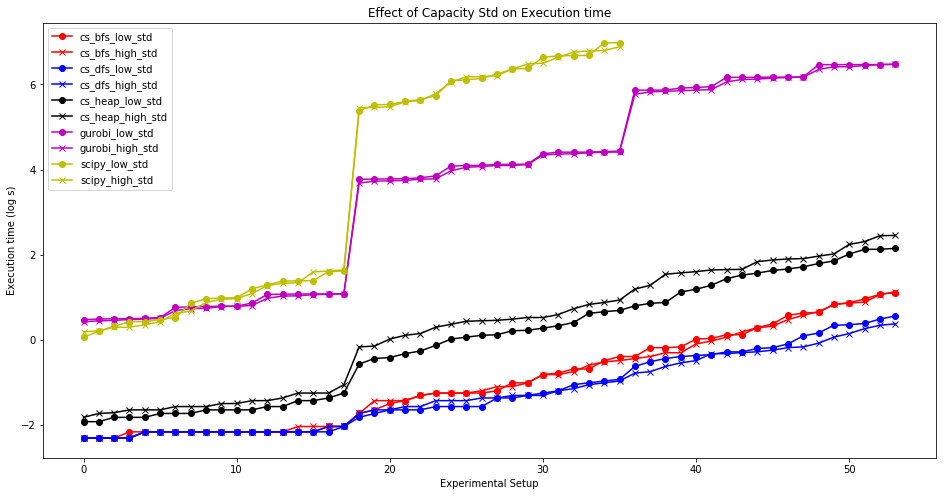

In [20]:
low_std_results = experiment_results1[(experiment_results1['std'] == '50') | (experiment_results1['std'] == '3')].sort_values('execution_time')
high_std_results = experiment_results1[(experiment_results1['std'] == '500') | (experiment_results1['std'] == '30')].sort_values('execution_time')

markers = ['o','D','+', '^', 'x']
colors = ['r','b','k','m','y']

fig = plt.figure(figsize=(16,8))
plt.title('High vs Low Std')
x_values = range(len(low_std_results.index) // len(algo_names))
plt.xlabel('Experimental Setup')
plt.ylabel('Execution time (log s)')
plt.title('Effect of Capacity Std on Execution time')

for name,color in zip(algo_names, colors):
    plt.plot(x_values, np.log(low_std_results[low_std_results['name'] == name]['execution_time']+eps), marker='o', color=color, label=name+'_low_std')
    plt.plot(x_values, np.log(high_std_results[high_std_results['name'] == name]['execution_time']+eps), marker='x', color=color, label=name+'_high_std')

plt.legend();
fig.savefig(figures_path + 'exp1_capacity_std.png')

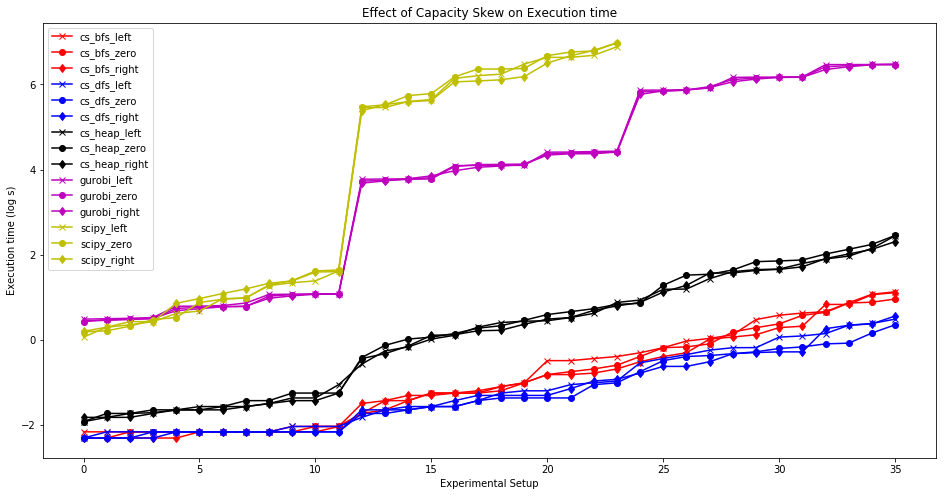

In [21]:
left_skew_results = experiment_results1[experiment_results1['skewness'] == '10'].sort_values('execution_time')
zero_skew_results = experiment_results1[experiment_results1['skewness'] == '0' ].sort_values('execution_time')
right_skew_results = experiment_results1[experiment_results1['skewness'] == '-10'].sort_values('execution_time')


colors = ['r','b','k','m','y']

fig = plt.figure(figsize=(16,8))
x_values = range(len(left_skew_results.index) // len(algo_names))
plt.xlabel('Experimental Setup')
plt.ylabel('Execution time (log s)')
plt.title('Effect of Capacity Skew on Execution time')

for name,color in zip(algo_names, colors):
    plt.plot(x_values, np.log(left_skew_results[left_skew_results['name'] == name]['execution_time']+eps), marker='x', color=color, label=name+'_left')
    plt.plot(x_values, np.log(zero_skew_results[zero_skew_results['name'] == name]['execution_time']+eps), marker='o', color=color, label=name+'_zero')
    plt.plot(x_values, np.log(right_skew_results[right_skew_results['name'] == name]['execution_time']+eps), marker='d', color=color, label=name+'_right')
    
plt.legend();
fig.savefig(figures_path + 'exp1_capacity_skew.png')

## Experiment 2

In [26]:
experiment_results2 = pd.read_csv(experiment_results_path + 'experiment2_bfs_vs_dfs.csv', sep='|')
experiment_results2 = experiment_results2.replace({'ERROR':np.nan, 'None':np.nan})
experiment_results2['execution_time'] = experiment_results2['execution_time'].astype(float)
experiment_results2['density'] = 1 - experiment_results2['sparsity']
experiment_results2['edge_count'] = experiment_results2['node_count']**2 / experiment_results2['sparsity']
fixed_stats_results = experiment_results2[(experiment_results2['mean']==50) &
                                          (experiment_results2['std']==30) &
                                          (experiment_results2['skewness']==0)]
algo_names = experiment_results2.name.unique()
show_grid(experiment_results2)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

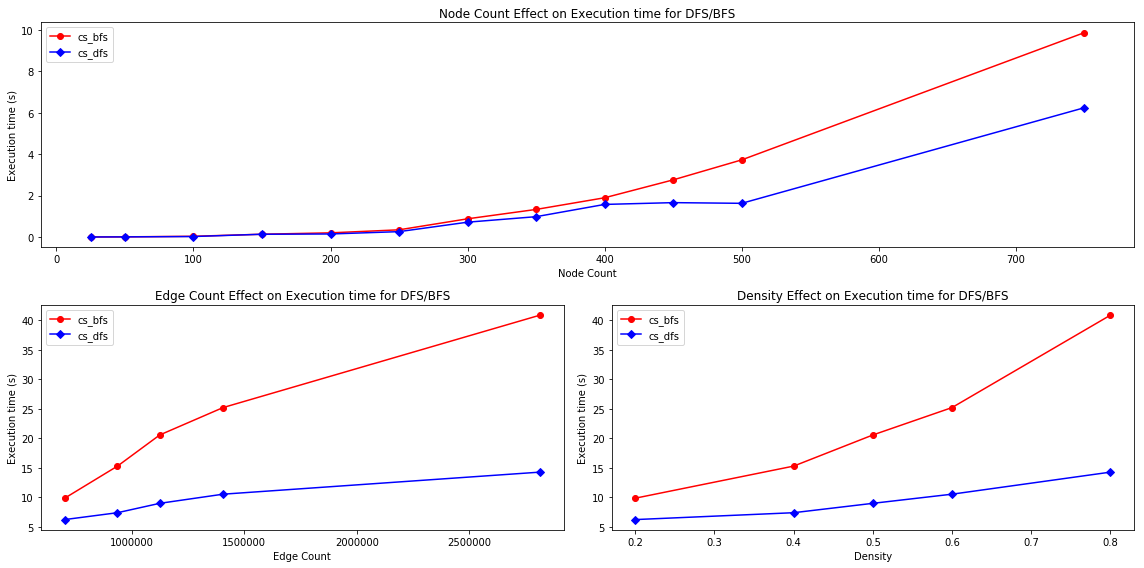

In [30]:

markers = ['o','D']
colors = ['r','b']

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0, :])
plt.xlabel('Node Count')
plt.ylabel('Execution time (s)')
plt.title('Node Count Effect on Execution time for DFS/BFS')

fixed_sparsity = fixed_stats_results[fixed_stats_results['sparsity']==0.8]
show_grid(fixed_sparsity)
for name, marker,color in zip(algo_names,markers,colors):
   plt.plot(fixed_sparsity['node_count'].unique(),
        fixed_sparsity[fixed_sparsity['name']==name]['execution_time'], label=name, marker=marker, color=color)
plt.legend()

ax = plt.subplot(gs[1, 0])
plt.xlabel('Edge Count')
plt.ylabel('Execution time (s)')
plt.title('Edge Count Effect on Execution time for DFS/BFS')

# fixed_sparsity[fixed_sparsity['name']==name]['execution_time'], label=name, marker=marker, color=color)
results_by_edge_count = fixed_node_count.groupby(['name', 'edge_count'])['execution_time'].mean()
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(fixed_node_count[name], label=name, marker=marker, color=color)  
plt.legend()

ax = plt.subplot(gs[1, 1])

plt.xlabel('Density')
plt.ylabel('Execution time (s)')
plt.title('Density Effect on Execution time for DFS/BFS')
fixed_node_count = fixed_stats_results[fixed_stats_results['node_count']==750]
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(fixed_node_count[fixed_node_count['name']==name]['density'],
        fixed_node_count[fixed_node_count['name']==name]['execution_time'], label=name, marker=marker, color=color)
plt.legend()

plt.tight_layout()
plt.show()
fig.savefig(figures_path + 'exp2_plot1')

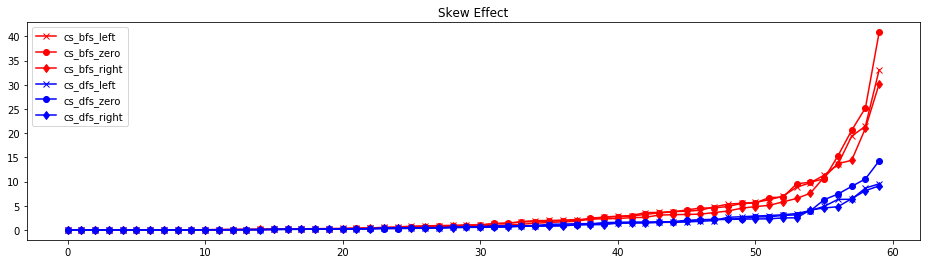

In [26]:
left_skew_results = experiment_results2[experiment_results2['skewness'] == 10].sort_values('execution_time')
zero_skew_results = experiment_results2[experiment_results2['skewness'] == 0 ].sort_values('execution_time')
right_skew_results = experiment_results2[experiment_results2['skewness'] == -10].sort_values('execution_time')

colors = ['r','b']

plt.figure(figsize=(16,4))
plt.title('Skew Effect')
x_values = range(len(left_skew_results.index) // len(algo_names))
for name,color in zip(algo_names, colors):
    plt.plot(x_values, (left_skew_results[left_skew_results['name'] == name]['execution_time']), marker='x', color=color, label=name+'_left')
    plt.plot(x_values, (zero_skew_results[zero_skew_results['name'] == name]['execution_time']), marker='o', color=color, label=name+'_zero')
    plt.plot(x_values, (right_skew_results[right_skew_results['name'] == name]['execution_time']), marker='d', color=color, label=name+'_right')
    
plt.legend();


## Experiment 3

In [7]:
experiment_results3 = pd.read_csv(experiment_results_path + 'experiment3_cs_vs_gurobi.csv', sep='|')
experiment_results3 = experiment_results3.replace({'ERROR':np.nan, 'None':np.nan})
experiment_results3['execution_time'] = experiment_results3['execution_time'].astype(float)
experiment_results3['density'] = 1 - experiment_results3['sparsity']
experiment_results3['edge_count'] = experiment_results3['node_count']**2 / experiment_results3['sparsity']
algo_names = experiment_results3.name.unique()
show_grid(experiment_results3)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

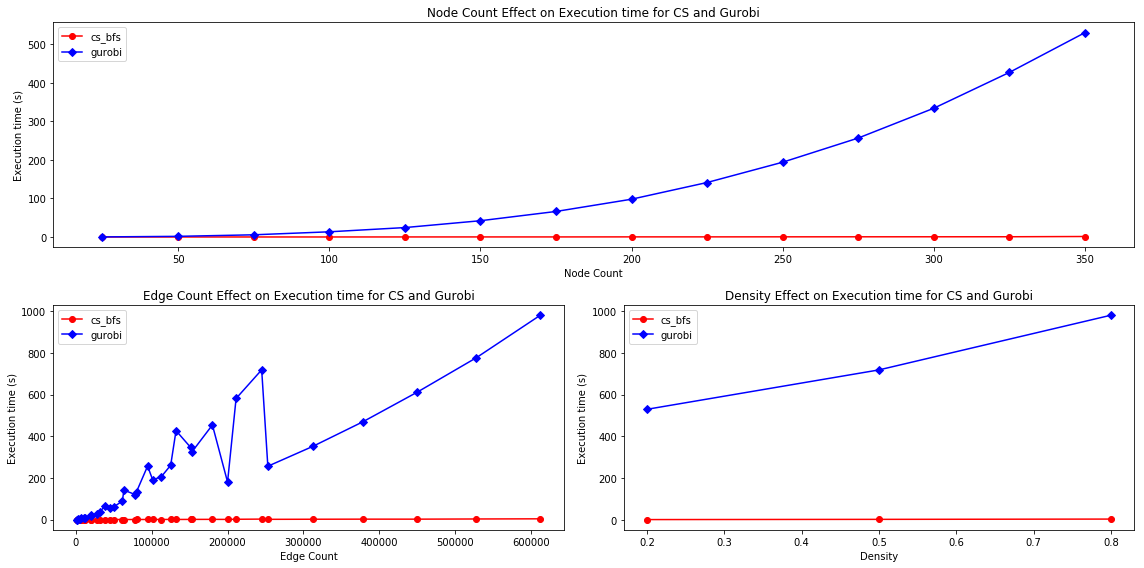

In [8]:
results_by_node_count = experiment_results3.groupby(['name', 'node_count'])['execution_time'].mean()
results_by_edge_count = experiment_results3.groupby(['name', 'edge_count'])['execution_time'].mean()

markers = ['o','D']
colors = ['r','b']

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0, :])
plt.xlabel('Node Count')
plt.ylabel('Execution time (s)')
plt.title('Node Count Effect on Execution time for CS and Gurobi')

fixed_sparsity = experiment_results3[experiment_results3['sparsity']==0.8]
show_grid(fixed_sparsity)
for name, marker,color in zip(algo_names,markers,colors):
   plt.plot(fixed_sparsity['node_count'].unique(),
        fixed_sparsity[fixed_sparsity['name']==name]['execution_time'], label=name, marker=marker, color=color)
plt.legend()
    
ax = plt.subplot(gs[1, 0])
plt.xlabel('Edge Count')
plt.ylabel('Execution time (s)')
plt.title('Edge Count Effect on Execution time for CS and Gurobi')

fixed_node_count = experiment_results3[experiment_results3['node_count']==350]
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(results_by_edge_count[name], label=name, marker=marker, color=color)  
plt.legend()


ax = plt.subplot(gs[1, 1])
plt.xlabel('Density')
plt.ylabel('Execution time (s)')
plt.title('Density Effect on Execution time for CS and Gurobi')

for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(fixed_node_count[fixed_node_count['name']==name]['density'],
        fixed_node_count[fixed_node_count['name']==name]['execution_time'], label=name, marker=marker, color=color)
plt.legend()

plt.tight_layout()
plt.show()
fig.savefig(figures_path + 'exp3p1')

## Experiment 4

In [9]:
experiment_results4 = pd.read_csv(experiment_results_path + 'experiment4_heap_vs_noheap.csv', sep='|')
experiment_results4 = experiment_results4.replace({'ERROR':np.nan, 'None':np.nan})
experiment_results4['execution_time'] = experiment_results4['execution_time'].astype(float)
experiment_results4['density'] = 1 - experiment_results4['sparsity']
experiment_results4['edge_count'] = experiment_results4['node_count']**2 / experiment_results4['sparsity']
algo_names = experiment_results4.name.unique()
show_grid(experiment_results4)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

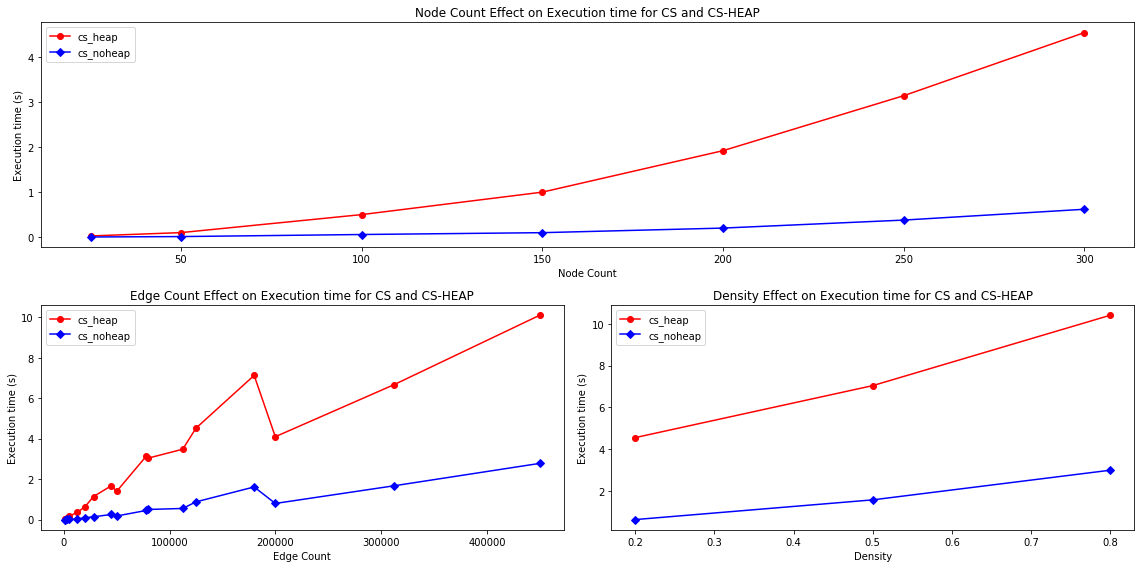

In [12]:
results_by_node_count = experiment_results4.groupby(['name', 'node_count'])['execution_time'].mean()
results_by_edge_count = experiment_results4.groupby(['name', 'edge_count'])['execution_time'].mean()

markers = ['o','D']
colors = ['r','b']

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0, :])
plt.xlabel('Node Count')
plt.ylabel('Execution time (s)')
plt.title('Node Count Effect on Execution time for CS and CS-HEAP')
fixed_stats_results = experiment_results4[(experiment_results4['mean']==50) &
                                          (experiment_results4['std']==30) &
                                          (experiment_results4['skewness']==0)]
fixed_sparsity = fixed_stats_results[fixed_stats_results['sparsity']==0.8]
show_grid(fixed_sparsity)
for name, marker,color in zip(algo_names,markers,colors):
   plt.plot(fixed_sparsity['node_count'].unique(),
        fixed_sparsity[fixed_sparsity['name']==name]['execution_time'], label=name, marker=marker, color=color)
plt.legend()
    
ax = plt.subplot(gs[1, 0])
plt.xlabel('Edge Count')
plt.ylabel('Execution time (s)')
plt.title('Edge Count Effect on Execution time for CS and CS-HEAP')

fixed_node_count = fixed_stats_results[fixed_stats_results['node_count']==300]
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(results_by_edge_count[name], label=name, marker=marker, color=color)  
plt.legend()


ax = plt.subplot(gs[1, 1])
plt.xlabel('Density')
plt.ylabel('Execution time (s)')
plt.title('Density Effect on Execution time for CS and CS-HEAP')

for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(fixed_node_count[fixed_node_count['name']==name]['density'],
        fixed_node_count[fixed_node_count['name']==name]['execution_time'], label=name, marker=marker, color=color)
plt.legend()

plt.tight_layout()
plt.show()
fig.savefig(figures_path + 'exp4p1')

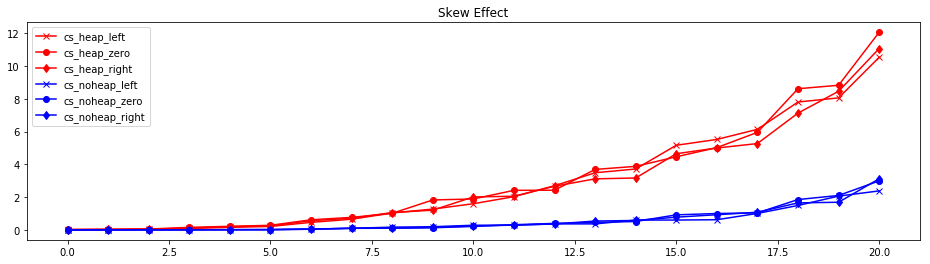

In [60]:
left_skew_results = experiment_results4[(experiment_results4['skewness'] == 10) & (experiment_results4['mean'] == 1000)].sort_values('execution_time')
zero_skew_results = experiment_results4[(experiment_results4['skewness'] == 0) & (experiment_results4['mean'] == 1000)].sort_values('execution_time')
right_skew_results = experiment_results4[(experiment_results4['skewness'] == -10) & (experiment_results4['mean'] == 1000)].sort_values('execution_time')

colors = ['r','b']

fig = plt.figure(figsize=(16,4))
plt.title('Skew Effect')
x_values = range(len(left_skew_results.index) // len(algo_names))
for name,color in zip(algo_names, colors):
    plt.plot(x_values, (left_skew_results[left_skew_results['name'] == name]['execution_time']), marker='x', color=color, label=name+'_left')
    plt.plot(x_values, (zero_skew_results[zero_skew_results['name'] == name]['execution_time']), marker='o', color=color, label=name+'_zero')
    plt.plot(x_values, (right_skew_results[right_skew_results['name'] == name]['execution_time']), marker='d', color=color, label=name+'_right')
    
plt.legend();
fig.savefig(figures_path + 'exp4p2')

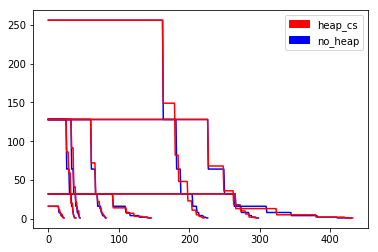

In [50]:
no_heap_Deltas = experiment_results4[experiment_results4['name'] == 'cs_noheap']['Deltas']
heap_Deltas = experiment_results4[experiment_results4['name'] == 'cs_heap']['Deltas']

plt.figure()
for row, heap_row in zip(no_heap_Deltas.iloc[range(0,126,16)], heap_Deltas.iloc[range(0,126,16)]):
    values = [float(val) for val in row[1:-1].split(',')] 
    plt.plot(values,color='b')
    values = [float(val) for val in heap_row[1:-1].split(',')] 
    plt.plot(values,color='r')


import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='heap_cs')
blue_patch = mpatches.Patch(color='blue', label='no_heap')
plt.legend(handles=[red_patch, blue_patch])
    
plt.show()

## Experiment 5

In [15]:
experiment_results5 = pd.read_csv(experiment_results_path + 'experiment5_c_comparison.csv', sep='|')
experiment_results5 = experiment_results5.replace({'ERROR':np.nan, 'None':np.nan})
experiment_results5['execution_time'] = experiment_results5['execution_time'].astype(float)
experiment_results5['edge_count'] = experiment_results5.node_count ** 2 / experiment_results5.sparsity
algo_names = experiment_results5.name.unique()
show_grid(experiment_results5)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

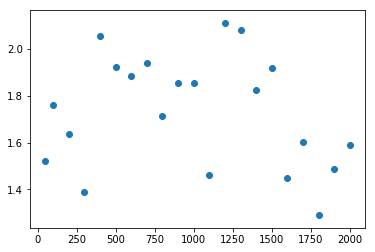

[[ 1.         -0.21123572]
 [-0.21123572  1.        ]]


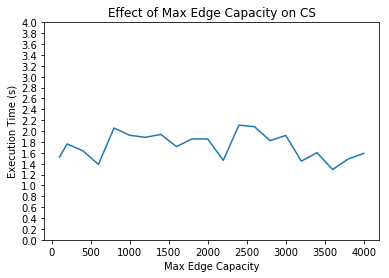

In [16]:
plt.scatter(experiment_results5['mean'],experiment_results5['execution_time'])
plt.show()
print(np.corrcoef(experiment_results5['mean'], experiment_results5['execution_time']))
plt.plot(2*experiment_results5['mean'], experiment_results5['execution_time'])
plt.xlabel('Max Edge Capacity')
plt.ylabel('Execution Time (s)')
plt.title('Effect of Max Edge Capacity on CS')
plt.yticks(2*np.arange(0,2.1,0.1))
plt.savefig(figures_path + 'exp5_c_plot')

In [42]:
experiment_results6 = pd.read_csv(experiment_results_path + 'experiment6_ff_vs_cs.csv', sep='|')
experiment_results6 = experiment_results6.replace({'ERROR':np.nan, 'None':np.nan})
experiment_results6['execution_time'] = experiment_results6['execution_time'].astype(float)
experiment_results6['density'] = 1 - experiment_results6['sparsity']
experiment_results6['edge_count'] = experiment_results6['node_count']**2 / experiment_results6['sparsity']
fixed_stats_results = experiment_results6[(experiment_results6['mean']==50) &
                                          (experiment_results6['std']==30) &
                                          (experiment_results6['skewness']==0)]
algo_names = experiment_results6.name.unique()
show_grid(experiment_results6)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

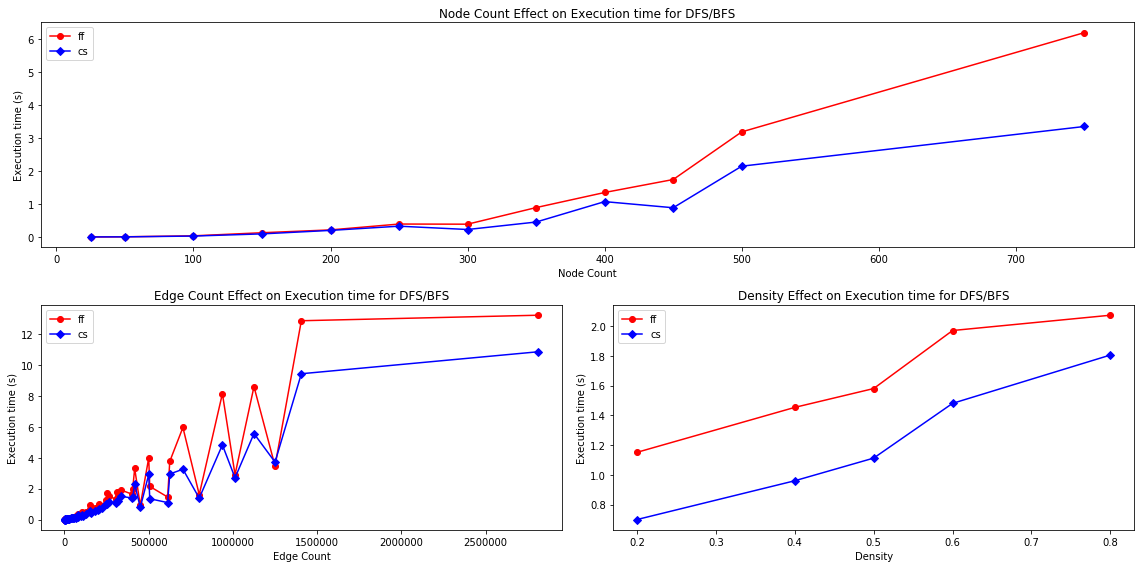

In [45]:
markers = ['o','D']
colors = ['r','b']

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0, :])
plt.xlabel('Node Count')
plt.ylabel('Execution time (s)')
plt.title('Node Count Effect on Execution time for DFS/BFS')

fixed_sparsity = fixed_stats_results[fixed_stats_results['sparsity']==0.8]
show_grid(fixed_sparsity)
for name, marker,color in zip(algo_names,markers,colors):
   plt.plot(fixed_sparsity['node_count'].unique(),
        fixed_sparsity[fixed_sparsity['name']==name]['execution_time'], label=name, marker=marker, color=color)
plt.legend()

ax = plt.subplot(gs[1, 0])
plt.xlabel('Edge Count')
plt.ylabel('Execution time (s)')
plt.title('Edge Count Effect on Execution time for DFS/BFS')

fixed_node_count = fixed_stats_results[fixed_stats_results['node_count']==750]

results_by_edge_count = experiment_results6.groupby(['name', 'edge_count'])['execution_time'].mean()
for name, marker,color in zip(algo_names,markers,colors):
   plt.plot(results_by_edge_count[name], label=name, marker=marker, color=color)  
plt.legend()

ax = plt.subplot(gs[1, 1])

plt.xlabel('Density')
plt.ylabel('Execution time (s)')
plt.title('Density Effect on Execution time for DFS/BFS')
for name, marker,color in zip(algo_names,markers,colors):
#     plt.plot(fixed_node_count[fixed_node_count['name']==name]['density'],
#         fixed_node_count[fixed_node_count['name']==name]['execution_time'], label=name, marker=marker, color=color)
    plt.plot(experiment_results6['density'].unique(),
        experiment_results6[experiment_results6['name']==name].groupby('sparsity')['execution_time'].mean(), label=name, marker=marker, color=color)

plt.legend()

plt.tight_layout()
plt.show()
fig.savefig(figures_path + 'exp6_plot1')

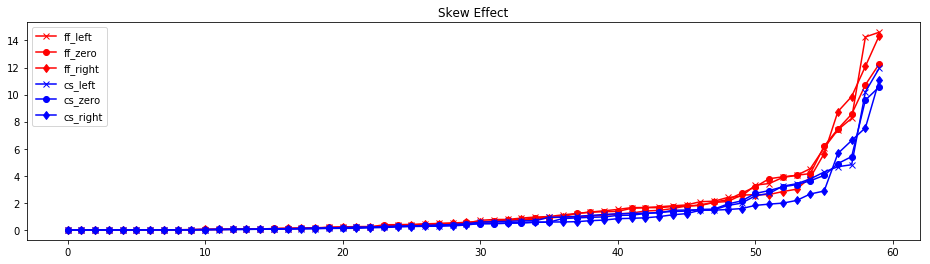

In [36]:
left_skew_results = experiment_results6[experiment_results6['skewness'] == 10].sort_values('execution_time')
zero_skew_results = experiment_results6[experiment_results6['skewness'] == 0 ].sort_values('execution_time')
right_skew_results = experiment_results6[experiment_results6['skewness'] == -10].sort_values('execution_time')

colors = ['r','b']

plt.figure(figsize=(16,4))
plt.title('Skew Effect')
x_values = range(len(left_skew_results.index) // len(algo_names))
for name,color in zip(algo_names, colors):
    plt.plot(x_values, (left_skew_results[left_skew_results['name'] == name]['execution_time']), marker='x', color=color, label=name+'_left')
    plt.plot(x_values, (zero_skew_results[zero_skew_results['name'] == name]['execution_time']), marker='o', color=color, label=name+'_zero')
    plt.plot(x_values, (right_skew_results[right_skew_results['name'] == name]['execution_time']), marker='d', color=color, label=name+'_right')
    
plt.legend();
fig.savefig(figures_path + 'exp6_plot2')